# Project 4

In this project, you will summarize and present your analysis from Projects 1-3.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
import scipy as sp

/Users/AR/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Intro: Write a problem Statement/ Specific Aim for this project

Answer: The goal of this project was to study the admissions data provided by UCLA and identify various factors influencing the admission of an applicant into grad school. Those factors include 'GRE', 'GPA', and 'Rank / Prestige' of the undergraduate school the applicant came from. The admission decision is provided as a binary variable (0 for not admitted, and 1 for admit). The hypothesis that was tested is as follows: "Test whether the prestige of undergrad alma matter positively affect the outcome of admission".

### Dataset:  Write up a description of your data and any cleaning that was completed

In [4]:
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna() 
print df.head()
df.describe()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


Answer: There are 4 columns as shown in the first few rows of the data above. There were 400 rows in total with some values missing, therefore after dropping the records with missing values, we have 397 rows of data for each column. These are the values that were used in further analysis. 'df.describe()' provides a data summary. For example, the GPA of applicants range from 2.26 - 4.00. GRE scores range from 220 - 800. The prestige of undergrad school is measured from 1 - 4 with 1 being the most prestigious and 4 being the least prestigious institution.

### Demo: Provide a table that explains the data by admission status

Mean (STD) or counts by admission status for each variable 

| Not Admitted | Admitted
---| ---|---
GPA | mean(std)  | mean(std)
GRE |mean(std) | mean(std)
Prestige 1 | frequency (%) | frequency (%)
Prestige 2 | frequency (%) | frequency (%)
Prestige 3 |frequency (%) | frequency (%)
Prestige 4 |frequency (%) | frequency (%)

In [5]:
#create dummy variables for prestige and join them to df. Then calculate frequency (most likely not in % format)
dv = df.join(pd.get_dummies(df['prestige'],prefix='prestige'))

In [8]:
dv.head()

,admit,gre,gpa,prestige,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,3.0,0,0,1,0
1,1,660.0,3.67,3.0,0,0,1,0
2,1,800.0,4.00,1.0,1,0,0,0
3,1,640.0,3.19,4.0,0,0,0,1
4,0,520.0,2.93,4.0,0,0,0,1


In [10]:
#get rid of real prestige column
dv = dv.drop('prestige',1)
dv.head()

,admit,gre,gpa,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,0,0,1,0
1,1,660.0,3.67,0,0,1,0
2,1,800.0,4.00,1,0,0,0
3,1,640.0,3.19,0,0,0,1
4,0,520.0,2.93,0,0,0,1


In [17]:
#calculate the mean for GRE, GPA and prestige variables by admit = 0 and 1.
stats = dv.groupby('admit').mean()
stats['Calc']='Mean'

# add (append) the standard deviation calculations to the calc column
stats=stats.append(dv.groupby('admit').std())
stats.fillna('Std.dev')

,Calc,gpa,gre,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
admit,,,,,,,
0,Mean,3.347159,573.579336,0.103321,0.350554,0.343173,0.202952
1,Mean,3.489206,618.571429,0.261905,0.420635,0.222222,0.095238
0,Std.dev,0.376355,116.052798,0.304941,0.478026,0.475647,0.402941
1,Std.dev,0.371655,109.257233,0.441426,0.495632,0.417399,0.294715


### Methods: Write up the methods used in your analysis

Answer: Through data visualization (plots, tables and stats) we had tried determine the effect of each variable on the admission status (0,1). We had also calculated the odds of getting into grad school based on the ranking of undergrad school of the applicant. Finally, we had applied the logistic regression function to the dataset (including the dummy variables) to calculate the probability of getting into grad school through various rankings of undergrad school. Using cartesian function, predictions were also calculated for GRE and GPA scores of applicants.

### Results: Write up your results

Answer: The methods applied in obtaining the results are thoroughly discussed in unit projects 2 and 3.
1. Odds Ratio calculations of prestige = 1 vs. the rest tell us that there is a 300% higher chance of getting in, if the student comes from highest ranking undergrad school.
2. These odds decrease every time the ranking goes down. For example, they decreased by 50% for prestige = 2 applicants.
3. Logistic regression results provided the Beta values/coefficients.GRE had the smallest coefficient,and odds ratio = 1 so it has the least to no impact on admission (0 or 1).
4. GRE's odds ratio prove that odds increase by 200% if the applicant has close to perfect GPA.
4. Cartesian function analysis (admisison prediction column) showed that any applicant from 4th ranking undergrad school has the lowest chance of getting admitted into grad school. Higher GPA along with higher GRE scores, provide pretty good chances of admission, (if the students is coming from schools ranking 2-3).

### Visuals: Provide a table or visualization of these results

In [29]:
# copying the odds ratio and logistic regression analysis from unit project 3.
#these steps are taken to use the same variables for cartesian function
dummy_ranks = pd.get_dummies(df['prestige'], prefix = 'prestige')
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2.0':])
print data.head()

   admit    gre   gpa  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61             0             1             0
1      1  660.0  3.67             0             1             0
2      1  800.0  4.00             0             0             0
3      1  640.0  3.19             0             0             1
4      0  520.0  2.93             0             0             1


/Users/AR/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [25]:
# manually add the intercept
data['intercept'] = 1.0

#slicing the admit column out, because that is  what we are prdicting based on prestige.
train_cols=['gre','gpa','prestige_2.0','prestige_3.0','prestige_4.0']

In [38]:
#using logit function
logit = sm.Logit(data['admit'], data[train_cols])
results = logit.fit()

Optimization terminated successfully.
         Current function value: 0.589121
         Iterations 5


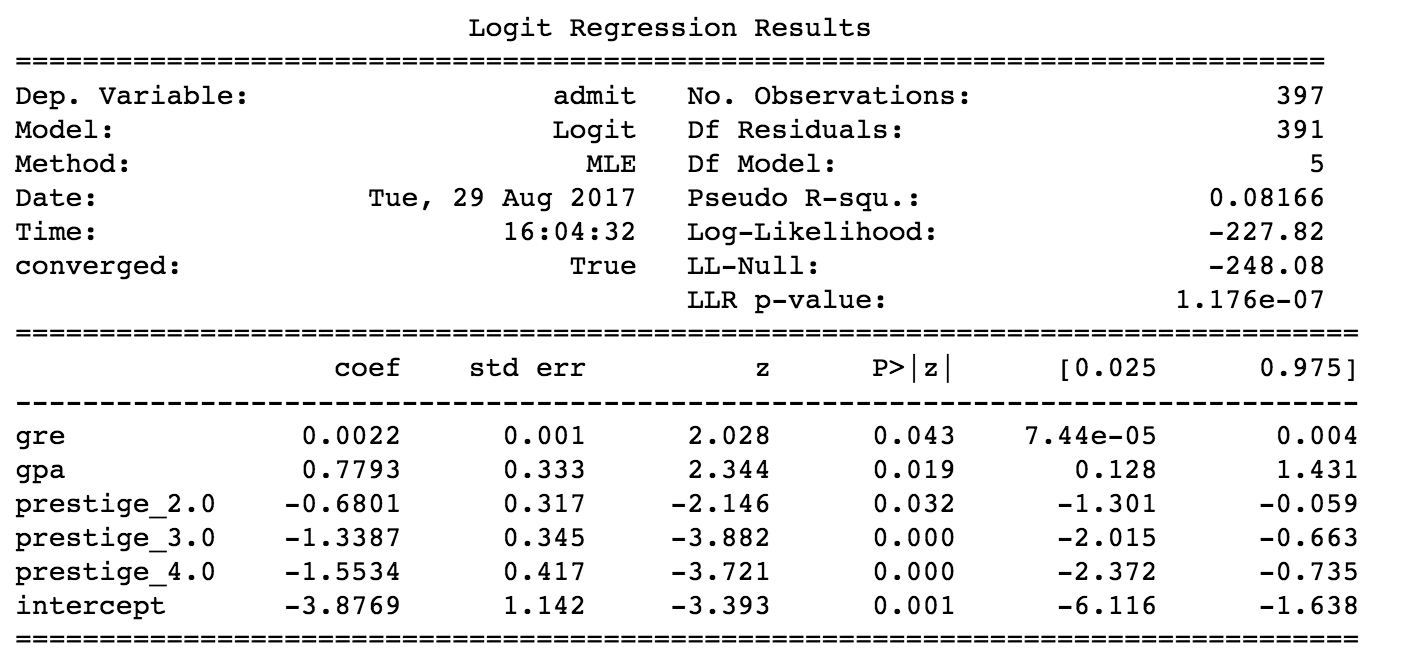

Above is the snap shot of the logistic regression results. It shows the coeffiient, p-valuea and confidence interval for the log odd scores.

<img src='placeholder.png' height= 25% width= 25%>

In [30]:
# going to replicate the code for cartesian function from unit project 3:
#cartesian product is every possible combination with coordinate system. 
#we are interested in variables in certain ranges.
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)
# recursive cartesian, calling itself multiple times.
#its a bit like a loop, calling the same function with the answers from previous call.
# the values decrease in each call.
    m = n / arrays[0].size
    print(m)
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [31]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print gres
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print gpas
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])


# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))

[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]
40
4
1
1


In [32]:
combos.head()

,0,1,2,3
0,220.0,2.260000,1.0,1.0
1,220.0,2.260000,2.0,1.0
2,220.0,2.260000,3.0,1.0
3,220.0,2.260000,4.0,1.0
4,220.0,2.453333,1.0,1.0


In [33]:
combos.columns = ['gre', 'gpa', 'prestige', 'intercept']
combos.describe()

,gre,gpa,prestige,intercept
count,400.000000,400.000000,400.000000,400.0
mean,510.000000,3.130000,2.500000,1.0
std,185.334387,0.556003,1.119434,0.0
min,220.000000,2.260000,1.000000,1.0
25%,348.888889,2.646667,1.750000,1.0
50%,510.000000,3.130000,2.500000,1.0
75%,671.111111,3.613333,3.250000,1.0
max,800.000000,4.000000,4.000000,1.0


In [34]:
# recreate the dummy variables
dummy_ranks2 = pd.get_dummies(combos['prestige'])

dummy_ranks2.columns = ['prestige_1', 'prestige_2', 'prestige_3', 'prestige_4']
dummy_ranks2.head()

,prestige_1,prestige_2,prestige_3,prestige_4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0


In [35]:
#data cleanup to keep relevant columns before prediction

cols_to_keep = ['gre', 'gpa', 'prestige', 'intercept']
combos = combos[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])

In [36]:
#predict admission based on combos
#adding prediction column to the end of data frame.
combos['admit.predict'] = results.predict(combos[train_cols])

In [37]:
combos

,gre,gpa,prestige,intercept,prestige_2.0,prestige_3.0,prestige_4.0,admit.predict
0,220.0,2.260000,1.0,1.0,0.0,1.0,0.0,0.177139
1,220.0,2.260000,2.0,1.0,0.0,1.0,0.0,0.177139
2,220.0,2.260000,3.0,1.0,0.0,0.0,0.0,0.500412
3,220.0,2.260000,4.0,1.0,0.0,0.0,1.0,0.133741
4,220.0,2.453333,1.0,1.0,0.0,0.0,1.0,0.130805
5,220.0,2.453333,2.0,1.0,1.0,0.0,0.0,0.272862
6,220.0,2.453333,3.0,1.0,0.0,0.0,0.0,0.494018
7,220.0,2.453333,4.0,1.0,1.0,0.0,0.0,0.272862
8,220.0,2.646667,1.0,1.0,0.0,1.0,0.0,0.169805
9,220.0,2.646667,2.0,1.0,1.0,0.0,0.0,0.267816


<img src='placeholder.png' height= 25% width= 25%>

### Discussion: Write up your discussion and future steps

Answer: 
Overall, the analysis and results indicated that applicants from prestige = 1 have the highest chance of getting admitted into grad school. For prestige = 2 and 3, higher GPA and GRE scores provide higher chance of getting admitted. Since the odds of admission decrease with each rank, it is extremely difficult for an applicant from prestige = 4 to get admitted into grad school.
    In future, I would like to study GPA and GRE in detail and determine what combination of those two scores improves the chances of admission for someone from lower ranking schools. Prestige = 2 only loses odds of positive result by 50%, but for prestige = 3 and 4, what is the optimal combination of GPA and GRE that they need to aspire to, in order to get admitted into grad school. Since their undergrad alma mater does not have the best reputation, it is not prudent to recommend the GRE score fo 800 and GPA of 4.0. There should be a range of scores, that is achieveable for them, and still provides them with reasonable chances of getting admitted. 